# Bonus Challenge: Spiral Data Classification

Now that you completed Challenge 2, you know you can use the Tensorflow Playground to experiment the hyperparameters of your deep learning model. If you are brave enough to take on this challenge, we present you the spiral data generated by codes and you will replicate your model built visually in the Tensorflow Playground with Python codes.

Below are the codes to generate the spiral dataset. Read the remarks and execute the codes.

In [1]:
from math import hypot, cos, sin
import numpy as np
import pandas as pd

"""
A function to generate X/Y data points that will form a spiral.
"""
def spiral(radius, step, resolution=.1, angle=0.0, start=0.0):
    dist = start
    coords=[]
    while dist*hypot(cos(angle),sin(angle))<radius:
        cord=[]
        cord.append(dist*cos(angle))
        cord.append(dist*sin(angle))
        coords.append(cord)
        dist+=step
        angle+=resolution
    return coords

In [2]:
# Generate two sets of spiral data points with opposite angles
data_1 = np.array(spiral(1000, 5, angle=0))
data_2 = np.array(spiral(1000, 5, angle=180))

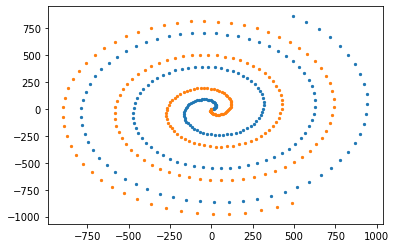

In [3]:
# Plot the two datasets to visualize the spirals

import matplotlib.pyplot as plt

a, b = data_1.T
plt.scatter(a, b, s=5)

aa, bb = data_2.T
plt.scatter(aa, bb, s=5)

plt.show()

In [4]:
# Combine the two spiral datasets into one

df1 = pd.DataFrame(data=data_1, columns=["X", "Y"])
df1["CLASS"] = 0

df2 = pd.DataFrame(data=data_2, columns=["X", "Y"])
df2["CLASS"] = 1

df = df1.append(df2)
df['CLASS'].value_counts()

1    201
0    200
Name: CLASS, dtype: int64

Now, build a neural network with Tensorflow to classify `df`. See how low data loss and how high accuracy can you achieve!

In [5]:
# your code here
df['xy']=df.X*df.Y
df['x2']=df.X**2
df['y2']=df.Y**2
df['sinx']=np.sin(df.X)
df['siny']=np.sin(df.Y)

In [6]:
df.head()

,X,Y,CLASS,xy,x2,y2,sinx,siny
0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000
1,4.975021,0.499167,0,2.483367,24.750832,0.249168,-0.965710,0.478694
2,9.800666,1.986693,0,19.470917,96.053050,3.946950,-0.367099,0.914754
3,14.330047,4.432803,0,63.522278,205.350257,19.649743,0.981456,-0.961170
4,18.421220,7.788367,0,143.471218,339.341342,60.658658,-0.415358,0.997848


In [7]:
X= df.drop(columns='CLASS')
y=df.CLASS

In [8]:
from sklearn.preprocessing import normalize
X_scaled = normalize(X)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)
print(X_train.shape); print(X_test.shape)

(320, 7)
(81, 7)


In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

learning_rate=0.01

model = Sequential()

model.add(Dense(500, input_dim=7, activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(20,activation='relu'))
# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile a model
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(
    learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam',),metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, epochs=500, batch_size=10)
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {},\n Loss: {}'.format(scores2[1], 1 - scores2[1], scores2[0]))   

Epoch 1/500
32/32 [==============================] - 3s 11ms/step - loss: 0.7069 - accuracy: 0.4812
Epoch 2/500
32/32 [==============================] - 0s 15ms/step - loss: 0.6934 - accuracy: 0.5156
Epoch 3/500
32/32 [==============================] - 0s 13ms/step - loss: 0.6937 - accuracy: 0.5156
Epoch 4/500
32/32 [==============================] - 0s 13ms/step - loss: 0.6931 - accuracy: 0.5156
Epoch 5/500
32/32 [==============================] - 0s 12ms/step - loss: 0.6928 - accuracy: 0.5156
Epoch 6/500
32/32 [==============================] - 0s 12ms/step - loss: 0.6936 - accuracy: 0.5156
Epoch 7/500
32/32 [==============================] - 0s 13ms/step - loss: 0.6929 - accuracy: 0.5156
Epoch 8/500
32/32 [==============================] - 0s 15ms/step - loss: 0.6929 - accuracy: 0.5156
Epoch 9/500
32/32 [==============================] - 0s 13ms/step - loss: 0.6934 - accuracy: 0.5156
Epoch 10/500
32/32 [==============================] - 0s 15ms/step - loss: 0.6935 - accuracy: 0.5156

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

learning_rate=0.001 #Change the learning rate

model = Sequential()

model.add(Dense(500, input_dim=7, activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(20,activation='relu'))
# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile a model
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(
    learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam',),metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=500, batch_size=10)
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {},\n Loss: {}'.format(scores2[1], 1 - scores2[1], scores2[0]))

Epoch 1/500
32/32 [==============================] - 1s 6ms/step - loss: 0.6970 - accuracy: 0.4719
Epoch 2/500
32/32 [==============================] - 0s 6ms/step - loss: 0.6945 - accuracy: 0.5094
Epoch 3/500
32/32 [==============================] - 0s 6ms/step - loss: 0.6947 - accuracy: 0.5063
Epoch 4/500
32/32 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.5125
Epoch 5/500
32/32 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.5094
Epoch 6/500
32/32 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.5188
Epoch 7/500
32/32 [==============================] - 0s 6ms/step - loss: 0.6923 - accuracy: 0.5031
Epoch 8/500
32/32 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.5250
Epoch 9/500
32/32 [==============================] - 0s 5ms/step - loss: 0.6895 - accuracy: 0.5250
Epoch 10/500
32/32 [==============================] - 0s 8ms/step - loss: 0.6949 - accuracy: 0.4812
Epoch 11/